In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3379,ham,Just finished. Missing you plenty,NaN,NaN,NaN
3695,ham,I am in tirupur. call you da.,NaN,NaN,NaN
2238,ham,Think you sent the text to the home phone. Tha...,NaN,NaN,NaN
4914,ham,We took hooch for a walk toaday and i fell ove...,NaN,NaN,NaN
317,ham,"Not really dude, have no friends i'm afraid :(",NaN,NaN,NaN
4819,spam,Check Out Choose Your Babe Videos @ sms.shsex....,NaN,NaN,NaN
1349,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...,NaN,NaN,NaN
2313,ham,So what do you guys do.,NaN,NaN,NaN
387,ham,Mm that time you dont like fun,NaN,NaN,NaN
2554,ham,I'll reach in ard 20 mins ok...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum() #null values

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df.sample(5)

,target,text
1752,0,Give one miss from that number please
3398,0,"Yeah we wouldn't leave for an hour at least, h..."
5067,0,Talk to g and x about that
4534,0,IM LATE TELLMISS IM ON MY WAY
175,0,Let me know when you've got the money so carlo...


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

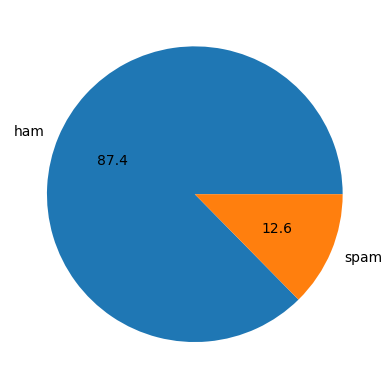

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.1f')
plt.show()

In [22]:
import nltk #Natural Language Toolkit - NLP Library

In [23]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
from nltk.tokenize import word_tokenize
df['num_words'] = df['text'].apply(lambda x:len( word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len( nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

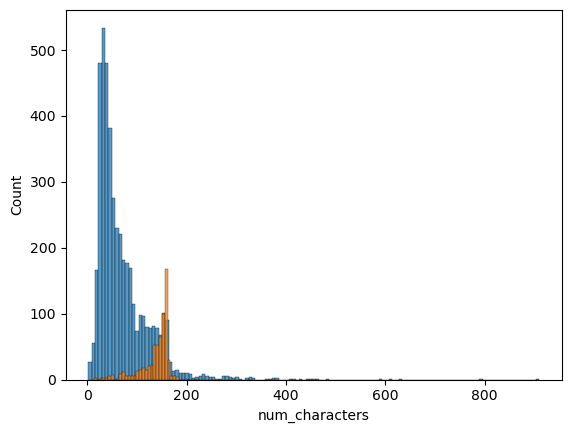

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

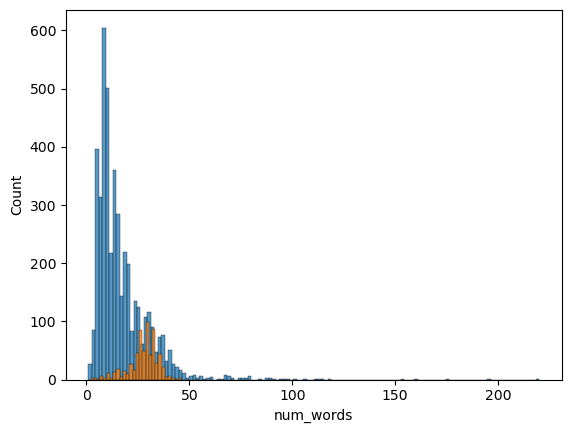

In [36]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

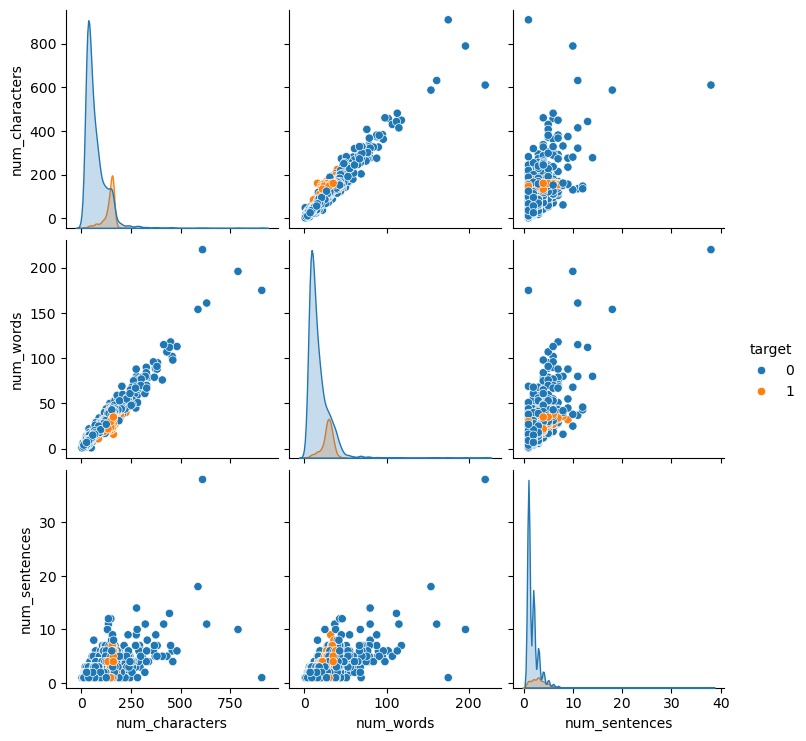

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

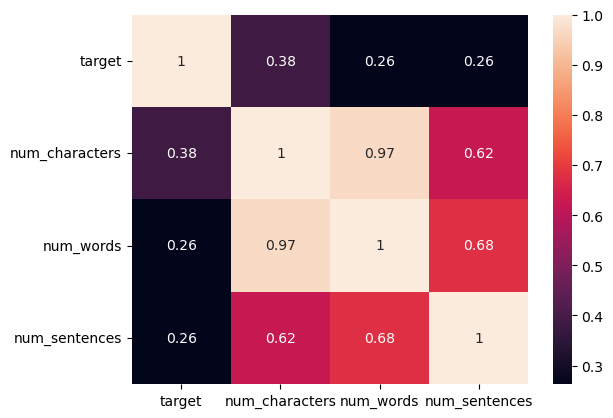

In [38]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

# Data Preprocessing

In [39]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [40]:
 def transform_text(text):
     text=text.lower()
     text=nltk.word_tokenize(text)
     y=[]
     for i in text:
         if i.isalnum():
             y.append(i)
     text = y[:]
     y.clear()
     for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)

     text=y[:]
     y.clear()
     for i in text:
         y.append(ps.stem(i))
     return " ".join(y)

In [41]:
transform_text('This is a test sentence to check the working of the function !!!')

'test sentenc check work function'

In [42]:
ps.stem('running')

'run'

In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

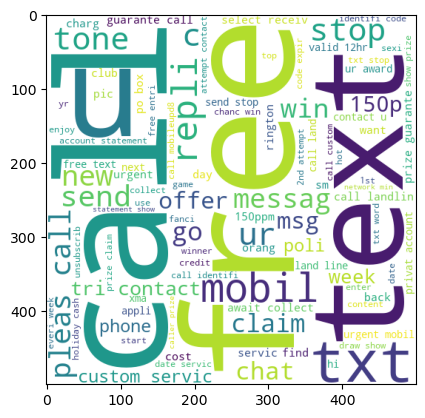

In [47]:
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

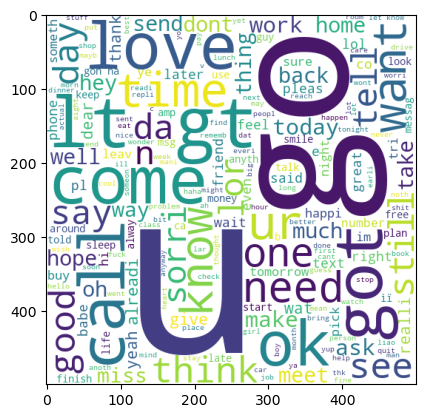

In [49]:
plt.imshow(ham_wc)

In [50]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(10))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
pd.DataFrame(Counter(ham_corpus).most_common(10))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model

In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()

In [81]:
X=tf.fit_transform(df['transformed_text']).toarray()

In [82]:
X.shape

(5169, 3000)

In [83]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
y=df['target'].values

In [85]:
y.shape

(5169,)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2 )

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [89]:
g=GaussianNB()
m=MultinomialNB()
b=BernoulliNB()

In [90]:
g.fit(X_train,y_train)
y_pred_g=g.predict(X_test)
acc_g=accuracy_score(y_test,y_pred_g)
print(acc_g)
print(confusion_matrix(y_test,y_pred_g))
print(precision_score(y_test,y_pred_g))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [91]:
m.fit(X_train,y_train)
y_pred_m=m.predict(X_test)
acc_g=accuracy_score(y_test,y_pred_m)
print(acc_g)
print(confusion_matrix(y_test,y_pred_m))
print(precision_score(y_test,y_pred_m))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [92]:
b.fit(X_train,y_train)
y_pred_b=b.predict(X_test)
acc_g=accuracy_score(y_test,y_pred_b)
print(acc_g)
print(confusion_matrix(y_test,y_pred_b))
print(precision_score(y_test,y_pred_b))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [94]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(m,open('model.pkl','wb'))